In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv('../reformat_data/train_wide.csv')
df.head()

,Text,Classes,ID,Labels,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,27,eebbqej,['neutral'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,['neutral'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,['anger'],0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,14,ed7ypvh,['fear'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,3,ed0bdzj,['annoyance'],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
emos = df.columns.tolist()
emos = emos[4:]

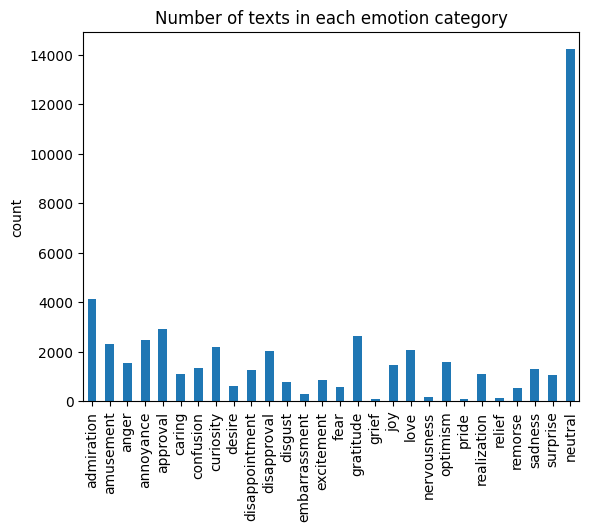

In [14]:
num_texts_4_each_emo = df[emos].sum()
num_texts_4_each_emo.plot.bar()
plt.ylabel('count')
plt.title('Number of texts in each emotion category')
plt.show();

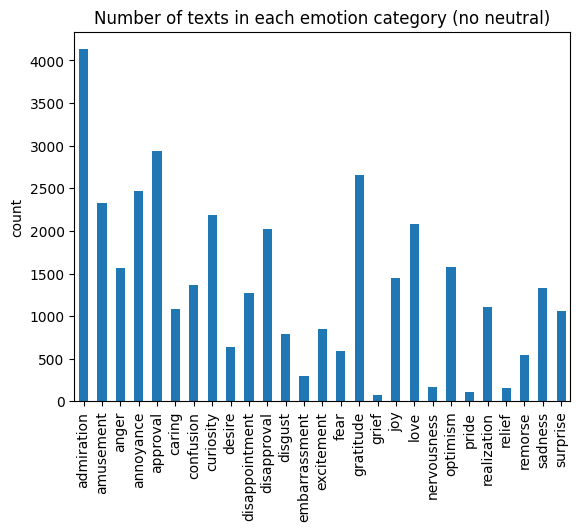

In [16]:
emos_noneutral = emos[:-1]
num_texts_4_each_emo = df[emos_noneutral].sum()
num_texts_4_each_emo.plot.bar()
plt.ylabel('count')
plt.title('Number of texts in each emotion category (no neutral)')
plt.show();

In [17]:
tfidfVec = TfidfVectorizer(stop_words='english')
X = tfidfVec.fit_transform(df.Text)

In [81]:
vocab = tfidfVec.get_feature_names_out()
print('The vocabulary size is', vocab.shape[0])

The vocabulary size is 26080


In [82]:
print('Show the words with highest Tfidf in each emotional category')
print()
top_k = 10
for emo in emos_noneutral:
    sub = X[df[df[emo]==1].index]
    submean = sub.mean(axis=0)
    idx = list(range(len(vocab)))
    idx.sort(key=lambda i:submean[0,i], reverse=True)
    print(f'The words associated with {emo.upper()} are')
    print(vocab[idx[:top_k]])
    print()

Show the words with highest Tfidf in each emotional category

The words associated with ADMIRATION are
['great' 'good' 'awesome' 'amazing' 'nice' 'best' 'like' 'pretty'
 'beautiful' 'love']

The words associated with AMUSEMENT are
['lol' 'haha' 'funny' 'fun' 'lmao' 'just' 'hilarious' 'joke' 'like'
 'hahaha']

The words associated with ANGER are
['fuck' 'hate' 'fucking' 'just' 'don' 'people' 'damn' 'hell' 'stupid'
 'like']

The words associated with ANNOYANCE are
['don' 'just' 'people' 'like' 'stupid' 'damn' 'fucking' 'shit' 'fuck'
 'hate']

The words associated with APPROVAL are
['agree' 'right' 'yes' 'like' 'good' 'yeah' 'just' 'true' 'think' 'sure']

The words associated with CARING are
['don' 'good' 'luck' 'help' 'better' 'just' 'worry' 'stay' 'feel' 'best']

The words associated with CONFUSION are
['don' 'know' 'sure' 'confused' 'understand' 'just' 'like' 'did' 'mean'
 'think']

The words associated with CURIOSITY are
['did' 'curious' 'just' 'know' 'like' 'does' 'really' 'think' 'r